# Hamoye Capstone Project - Telecom Customer Churn Prediction

# Project Version v2.2 - Amit Purswani

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Source
https://www.kaggle.com/blastchar/telco-customer-churn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### There is class imbalance for target variable, which needs to be balanced before running ML algorithms for classification.

In [9]:
df[df.isin([' '])].stack()

488   TotalCharges     
753   TotalCharges     
936   TotalCharges     
1082  TotalCharges     
1340  TotalCharges     
3331  TotalCharges     
3826  TotalCharges     
4380  TotalCharges     
5218  TotalCharges     
6670  TotalCharges     
6754  TotalCharges     
dtype: object

In [10]:
df.loc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### These are new customers which are less than one month old as Churn is No and monthly charges are present, but being new their Total Charges are not generated so they will be replaced by Zero.

In [11]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df['TotalCharges']=df['TotalCharges'].replace(to_replace=' ', value='0')

In [13]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [14]:
df['ratio']=df['TotalCharges']/df['MonthlyCharges']

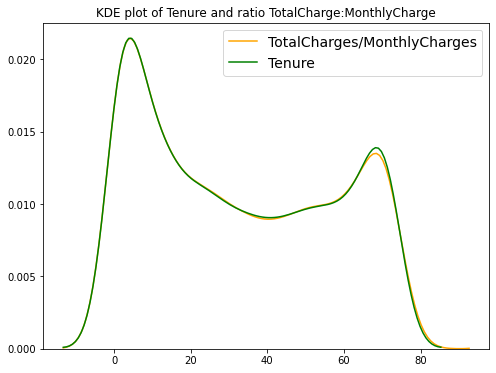

In [15]:
#Comparing Tenure and ratio of TotalCharges to Monthly Charges
plt.figure(figsize=(8,6))
sns.kdeplot(df['ratio'], color='orange', label='TotalCharges/MonthlyCharges')
sns.kdeplot(df['tenure'], color='green', label='Tenure')
plt.title('KDE plot of Tenure and ratio TotalCharge:MonthlyCharge')
plt.legend(loc='upper right', fontsize=14)
plt.show()

#### We observed that Tenure * Monthly Charges ≈ Total Charges or in other words Tenure ≈  Total Charges / Monthly Charges.

## About Numerical Features

#### Lets see Churn w.r.t. Numerical features Tenure, Monthly Charges and Total Charges.

#### Churn w.r.t. Tenure

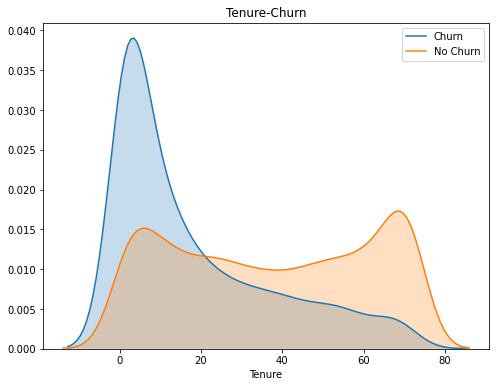

In [16]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.tenure[df.Churn=='Yes'], label='Churn', shade=True)
sns.kdeplot(df.tenure[df.Churn=='No'], label='No Churn', shade=True)
plt.title('Tenure-Churn')
plt.xlabel('Tenure');

#### Observation 1: More Churn is observed in customers with less Tenure, i.e. recent customers are more likely to Churn.

#### Churn w.r.t. Monthly Charges

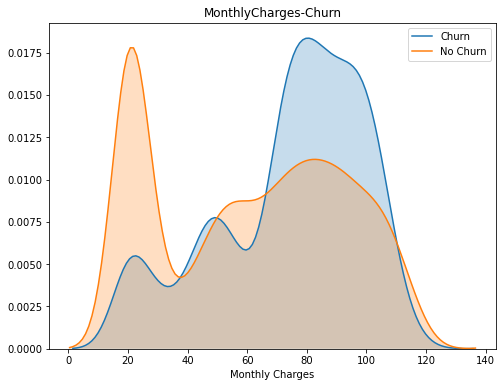

In [17]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.MonthlyCharges[df.Churn=='Yes'], label='Churn', shade=True)
sns.kdeplot(df.MonthlyCharges[df.Churn=='No'], label='No Churn', shade=True)
plt.title('MonthlyCharges-Churn')
plt.xlabel('Monthly Charges');

#### Observation 2: More Churn is observed in customers with High Monthly charges. Also, as there is substantial increase in Monthly charges there is significant Churn of customers.

#### Churn w.r.t. Total Charges

Text(0.5, 1.0, 'TotalCharges-Churn')

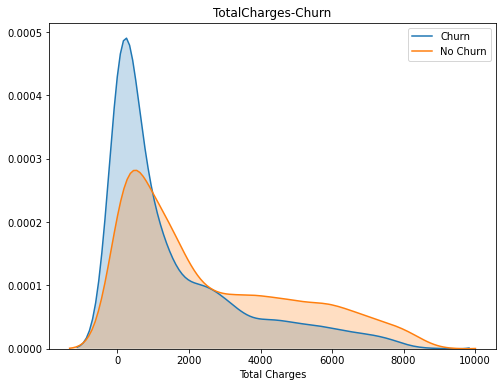

In [18]:
plt.figure(figsize=(8,6))
sns.kdeplot(df.TotalCharges[df.Churn=='Yes'], label='Churn', shade=True)
sns.kdeplot(df.TotalCharges[df.Churn=='No'], label='No Churn', shade=True)
plt.xlabel('Total Charges');
plt.title('TotalCharges-Churn')

#### Observation 3: Clients with High Total Charges are most likely to Churn. Majority Churn happens when Total Charges are in a certain band, as Total Charges increase further Churn rate is low as the only customers left are more likely to pay for services and stay with service provider.

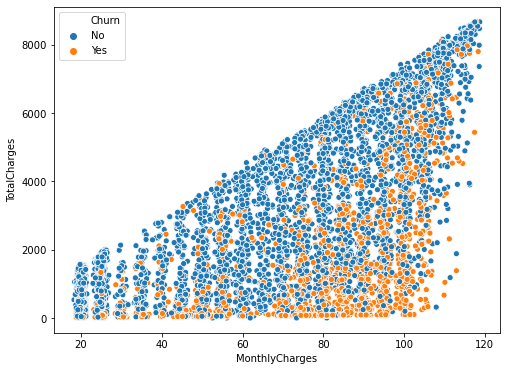

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df);

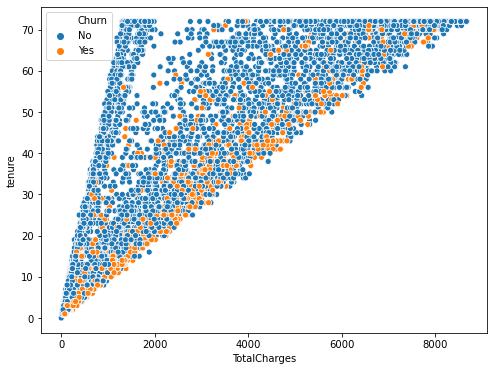

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df);

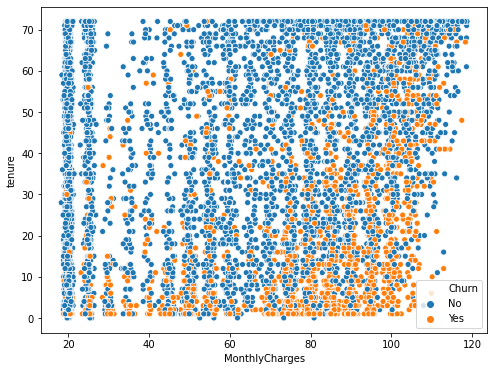

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df);

## About Categorical Features

#### Churn w.r.t. Gender

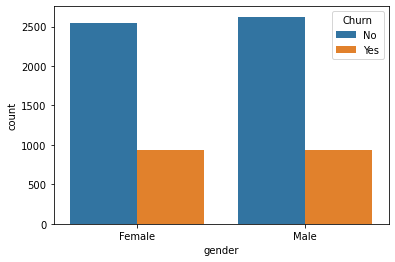

In [22]:
sns.countplot(x='gender', hue='Churn', data=df)

#### Gender doesn't seem to be specific for Churn.

#### Churn w.r.t Seniority

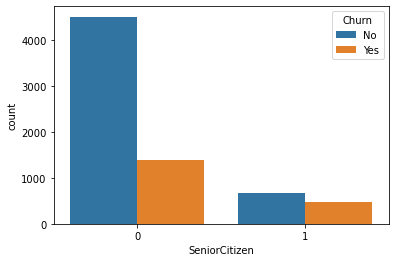

In [23]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

## Study Churn w.r.t. various other services

In [24]:
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}

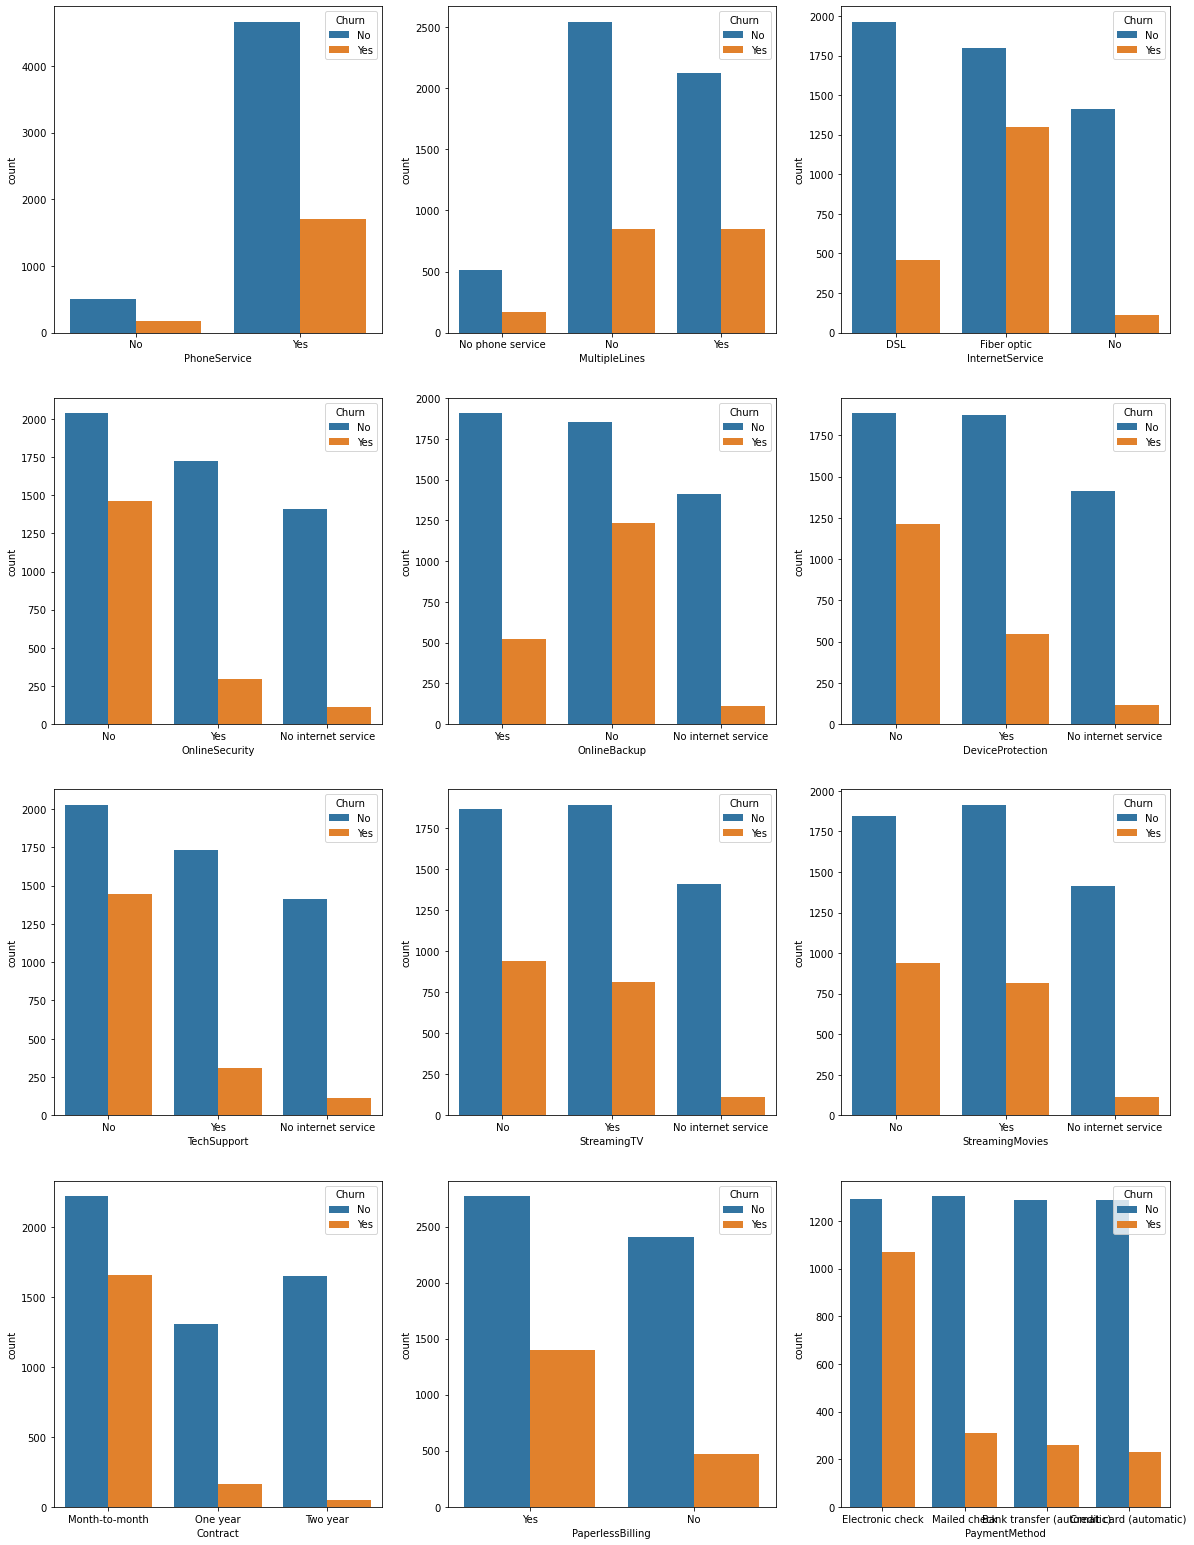

In [25]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

## Churn w.r.t. to Phone lines, Internet Connection and other services.

In [26]:
(pd.crosstab(df.MultipleLines,df.Churn,normalize='index')*100).round(2)

Churn,No,Yes
MultipleLines,,
No,74.96,25.04
No phone service,75.07,24.93
Yes,71.39,28.61


In [27]:
(pd.crosstab(df.MultipleLines,df.Churn,normalize='columns')*100).round(2)

Churn,No,Yes
MultipleLines,,
No,49.11,45.43
No phone service,9.90,9.10
Yes,40.99,45.48


In [28]:
(pd.crosstab(df.StreamingTV,df.Churn,normalize='index')*100).round(2)

Churn,No,Yes
StreamingTV,,
No,66.48,33.52
No internet service,92.60,7.40
Yes,69.93,30.07


In [29]:
(pd.crosstab(df.StreamingTV,df.Churn,normalize='columns')*100).round(2)

Churn,No,Yes
StreamingTV,,
No,36.10,50.40
No internet service,27.31,6.05
Yes,36.59,43.55


In [30]:
(pd.crosstab(df.StreamingMovies,df.Churn,normalize='index')*100).round(2)

Churn,No,Yes
StreamingMovies,,
No,66.32,33.68
No internet service,92.60,7.40
Yes,70.06,29.94


In [31]:
(pd.crosstab(df.StreamingMovies,df.Churn,normalize='columns')*100).round(2)

Churn,No,Yes
StreamingMovies,,
No,35.70,50.19
No internet service,27.31,6.05
Yes,36.99,43.77


Observations:<br>1.Churn rate of clients with multiple lines is almost same as clients which don't have multiple lines.
<br>2.Churn rate of customers with Fibre Optic Internet connection is much higher than customers with DSL connection.
<br>3.Customers who have not taken services such as Online security, Online Backup, Device Protection and Tech Support are more likely to churn than the customers who have taken these services.

## Replacing Churn Yes with 1 and No with 0

In [32]:
#Replacing Churn Yes with 1 and No with 0
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)

In [33]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
ratio               float64
dtype: object

## Churn w.r.t. Gender

In [34]:
(pd.crosstab(df.gender,df.Churn, normalize='index')*100).round(2)

Churn,0,1
gender,,
Female,73.08,26.92
Male,73.84,26.16


#### Gender doesn't seem to be specific for Churn.

## Churn w.r.t. Age, Partner and Dependents.

In [35]:
(pd.crosstab(df.SeniorCitizen,df.Churn,normalize='index')*100).round(2)

Churn,0,1
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


In [36]:
(df['SeniorCitizen'].value_counts()/len(df)).round(2)*100

0    84.0
1    16.0
Name: SeniorCitizen, dtype: float64

In [37]:
(pd.crosstab(df.Partner,df.Churn,normalize='index')*100).round(2)

Churn,0,1
Partner,,
No,67.04,32.96
Yes,80.34,19.66


In [38]:
(pd.crosstab(df.Dependents,df.Churn,normalize='index')*100).round(2)

Churn,0,1
Dependents,,
No,68.72,31.28
Yes,84.55,15.45


It is observed that Senior Citizens form only 16% of Total Customers but the Churn rate among Seniors is much higher at 42% as compared to 24% in Non-Senior citizens.<br>
Customers with No Partner are more likely to Churn than customers with Partner.<br>
Customers without any dependents are twice as likely to Churn than customers with dependents.

## Churn w.r.t. Contract type

In [39]:
(pd.crosstab(df.Contract,df.Churn,normalize='index')*100).round(2)

Churn,0,1
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


Customers with month-to-month contract are very likely to Churn as much as 42%, whereas Customers with One year and Two year contracts have very less Churn rates.

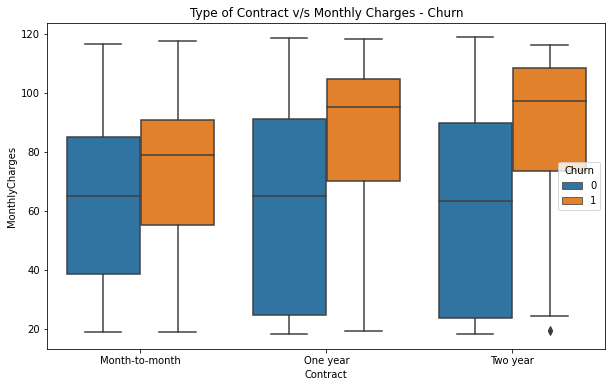

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Contract',y='MonthlyCharges', hue='Churn', data=df)
plt.title('Type of Contract v/s Monthly Charges - Churn')
plt.show()

We can clearly see that in each type of Contract the Customers who decided to exit were paying high monthly charges as compared to others.

# Treating Class Imbalance

In [41]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

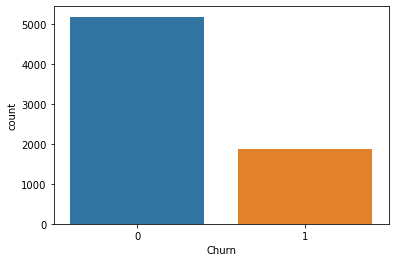

In [42]:
sns.countplot(x='Churn', data=df)

We will do class balancing by undersampling No Churn. 

In [43]:
# Undersample the No Churn data
no_churn = len(df[df['Churn'] == 1])
non_churn_indices = df[df.Churn == 0].index
random_indices = np.random.choice(non_churn_indices,no_churn, replace=False)
churn_indices = df[df.Churn == 1].index
under_sample_indices = np.concatenate([churn_indices,random_indices])
under_sample = df.loc[under_sample_indices]

In [44]:
no_churn

1869

In [45]:
non_churn_indices

Int64Index([   0,    1,    3,    6,    7,    9,   10,   11,   12,   14,
            ...
            7030, 7031, 7033, 7035, 7036, 7037, 7038, 7039, 7040, 7042],
           dtype='int64', length=5174)

In [46]:
random_indices

array([4033, 5754, 4878, ..., 1382, 6711, 2401], dtype=int64)

In [47]:
len(random_indices)

1869

In [48]:
len(under_sample_indices)

3738

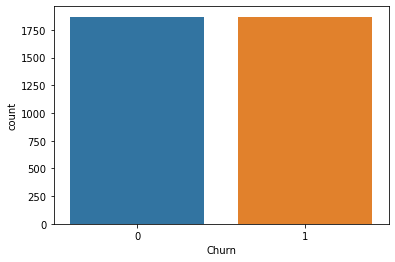

In [49]:
sns.countplot(x='Churn', data=under_sample)

In [50]:
under_sample['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [51]:
under_sample.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ratio
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2.008357
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2.144979
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,8.233818
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,29.065363
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,48.566056


In [52]:
under_sample = under_sample.drop(columns=['StreamingMovies','StreamingTV','MultipleLines'],axis=1)

# Encoding Categorical Data

In [53]:
df_encoded = pd.get_dummies(under_sample, columns=['Partner', 'Dependents',
'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [54]:
df_encoded

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ratio,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,Male,0,2,53.85,108.15,1,2.008357,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,9237-HQITU,Female,0,2,70.70,151.65,1,2.144979,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,Female,0,8,99.65,820.50,1,8.233818,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
8,7892-POOKP,Female,0,28,104.80,3046.05,1,29.065363,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
13,0280-XJGEX,Male,0,49,103.70,5036.30,1,48.566056,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2469-DTSGX,Female,1,72,111.65,7943.45,0,71.145992,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0
3460,2669-OIDSD,Female,0,48,100.05,4834.00,0,48.315842,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
1382,4538-WNTMJ,Female,0,46,24.95,1165.90,0,46.729459,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
6711,3545-CNWRG,Female,0,49,98.35,4889.20,0,49.712252,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


# Features and Target

In [55]:
df_encoded.head(1)

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,ratio,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,3668-QPYBK,Male,0,2,53.85,108.15,1,2.008357,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [56]:
x = df_encoded.drop(['customerID','gender','ratio','Churn'],axis=1)
y = df_encoded['Churn']

In [57]:
x.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,2,53.85,108.15,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


# Normalizing the data using MinMax Scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [59]:
x_scaled.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.027778,0.354582,0.012453,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.027778,0.522410,0.017462,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.111111,0.810757,0.094475,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Train Test Split

In [60]:
## Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=101)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

In [62]:
def apply_model(model1):
    model = model1
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = cross_val_score(model, x_train, y_train, cv = 6)
    accuracy_train = model.score(x_train, y_train)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    logloss= log_loss(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    class_rep=classification_report(y_test, y_pred)


    
    print ('Accuracy score on Test is ', accuracy)
    print ('AUC Score is', auc)
    print ('F1 Score is ', f1score)
    print ('Confusion Matrix\n\n', cm)
    print('Classification Report is\n', class_rep)

# 1 Logistic Regression

In [63]:
apply_model(LogisticRegression())

Accuracy score on Test is  0.7736185383244206
AUC Score is 0.7734118813391291
F1 Score is  0.782905982905983
Confusion Matrix

 [[410 148]
 [106 458]]
Classification Report is
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       558
           1       0.76      0.81      0.78       564

    accuracy                           0.77      1122
   macro avg       0.78      0.77      0.77      1122
weighted avg       0.78      0.77      0.77      1122



# 2 SVM

In [64]:
apply_model(SVC())

Accuracy score on Test is  0.7647058823529411
AUC Score is 0.7645275680622283
F1 Score is  0.7731958762886597
Confusion Matrix

 [[408 150]
 [114 450]]
Classification Report is
               precision    recall  f1-score   support

           0       0.78      0.73      0.76       558
           1       0.75      0.80      0.77       564

    accuracy                           0.76      1122
   macro avg       0.77      0.76      0.76      1122
weighted avg       0.77      0.76      0.76      1122



# 3 KNeighbors

In [65]:
apply_model(KNeighborsClassifier())

Accuracy score on Test is  0.7299465240641712
AUC Score is 0.7296099290780143
F1 Score is  0.7468671679197995
Confusion Matrix

 [[372 186]
 [117 447]]
Classification Report is
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       558
           1       0.71      0.79      0.75       564

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



# 4 Random Forest

In [66]:
apply_model(RandomForestClassifier())

Accuracy score on Test is  0.7575757575757576
AUC Score is 0.7574067719057425
F1 Score is  0.76592082616179
Confusion Matrix

 [[405 153]
 [119 445]]
Classification Report is
               precision    recall  f1-score   support

           0       0.77      0.73      0.75       558
           1       0.74      0.79      0.77       564

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



# 5 AdaBoost

In [67]:
apply_model(AdaBoostClassifier())

Accuracy score on Test is  0.7896613190730838
AUC Score is 0.7893121329977884
F1 Score is  0.8033333333333333
Confusion Matrix

 [[404 154]
 [ 82 482]]
Classification Report is
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       558
           1       0.76      0.85      0.80       564

    accuracy                           0.79      1122
   macro avg       0.79      0.79      0.79      1122
weighted avg       0.79      0.79      0.79      1122



# 6 DCT 

In [68]:
apply_model(DecisionTreeClassifier())

Accuracy score on Test is  0.6925133689839572
AUC Score is 0.6923758865248227
F1 Score is  0.7012987012987013
Confusion Matrix

 [[372 186]
 [159 405]]
Classification Report is
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       558
           1       0.69      0.72      0.70       564

    accuracy                           0.69      1122
   macro avg       0.69      0.69      0.69      1122
weighted avg       0.69      0.69      0.69      1122



# 7 XGB

In [69]:
apply_model(XGBClassifier())

[20:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<b>Version 1</b> - With StreamingTV, StreamingMovies and MultipleLines<br>
Highest Accuracy so far by Adaboost<br>
Accuracy score on Test is  78.52<br>

<b>Version 2</b> - Dropping StreamingTV, StreamingMovies and MultipleLines<br>
Highest Accuracy is again by Adaboost 79.59%


## Hyperparameter tuning in Adaboost using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [72]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=101)

In [73]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[100,200,500,1000],'learning_rate':[0.001,0.01,0.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [74]:
search.fit(x_train,y_train)
search.best_score_

0.7580298909069638

In [75]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [76]:
imp = search.best_estimator_.feature_importances_
imp

array([0.006, 0.366, 0.166, 0.02 , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.095, 0.006, 0.028, 0.009, 0.   , 0.028, 0.012,
       0.   , 0.   , 0.016, 0.   , 0.016, 0.005, 0.   , 0.054, 0.   ,
       0.054, 0.027, 0.033, 0.   , 0.   , 0.059, 0.   ])

In [77]:
sorted(zip(imp,x_train),reverse = True)

[(0.366, 'tenure'),
 (0.166, 'MonthlyCharges'),
 (0.095, 'InternetService_Fiber optic'),
 (0.059, 'PaymentMethod_Electronic check'),
 (0.054, 'Contract_Two year'),
 (0.054, 'Contract_Month-to-month'),
 (0.033, 'PaperlessBilling_Yes'),
 (0.028, 'OnlineSecurity_No'),
 (0.028, 'OnlineBackup_No'),
 (0.027, 'PaperlessBilling_No'),
 (0.02, 'TotalCharges'),
 (0.016, 'TechSupport_No'),
 (0.016, 'DeviceProtection_No internet service'),
 (0.012, 'OnlineBackup_No internet service'),
 (0.009, 'OnlineSecurity_No internet service'),
 (0.006, 'SeniorCitizen'),
 (0.006, 'InternetService_No'),
 (0.005, 'TechSupport_No internet service'),
 (0.0, 'TechSupport_Yes'),
 (0.0, 'PhoneService_Yes'),
 (0.0, 'PhoneService_No'),
 (0.0, 'PaymentMethod_Mailed check'),
 (0.0, 'PaymentMethod_Credit card (automatic)'),
 (0.0, 'PaymentMethod_Bank transfer (automatic)'),
 (0.0, 'Partner_Yes'),
 (0.0, 'Partner_No'),
 (0.0, 'OnlineSecurity_Yes'),
 (0.0, 'OnlineBackup_Yes'),
 (0.0, 'InternetService_DSL'),
 (0.0, 'DevicePro

## Using tuning parameters in Adaboost

In [78]:
ada_tuned=AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
ada_tuned.fit(x_train,y_train)
y_pred_1 = ada_tuned.predict(x_test)

In [81]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
auc_1 = roc_auc_score(y_test, y_pred_1)
f1score_1 = f1_score(y_test, y_pred_1)
cm_1 = confusion_matrix(y_test, y_pred_1)
class_rep_1=classification_report(y_test, y_pred_1)


print ('Accuracy score on Test is ', accuracy_1)
print ('AUC Score is', auc_1)
print ('F1 Score is ', f1score_1)
print ('Confusion Matrix\n\n', cm_1)
print('Classification Report is\n', class_rep_1)

Accuracy score on Test is  0.7905525846702317
AUC Score is 0.7902272553954091
F1 Score is  0.8033472803347281
Confusion Matrix

 [[407 151]
 [ 84 480]]
Classification Report is
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       558
           1       0.76      0.85      0.80       564

    accuracy                           0.79      1122
   macro avg       0.79      0.79      0.79      1122
weighted avg       0.79      0.79      0.79      1122



## Selecting best features

In [82]:
x_feat = under_sample[['customerID', 'gender', 'SeniorCitizen', 'tenure', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ratio']]

In [83]:
len(x_feat.columns)

15

Best Features selcted: Total Charges 1
Monthly Charges 2
Tenure 3
PhoneService 4
InternetService 5
SeniorCitizen 6
OnlineBackup 7
PaymentMethod 8
PaperlessBilling 9
DeviceProtection 10
Contract 11
TechSupport 12

## Encoding categorical variables

In [84]:
df_encoded = pd.get_dummies(x_feat, columns=['InternetService',
       'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [85]:
x = df_encoded.drop(['customerID','gender','ratio','Churn'],axis=1)
y = df_encoded['Churn']

In [86]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [87]:
x_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.027778,0.354582,0.012453,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.027778,0.522410,0.017462,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.111111,0.810757,0.094475,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.388889,0.862052,0.350733,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.680556,0.851096,0.579898,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [88]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_scaled, y, test_size=0.3, random_state=101)

In [89]:
ada_tuned.fit(x_train_new,y_train_new)
y_pred_new = ada_tuned.predict(x_test_new)

In [90]:
accuracy_new = accuracy_score(y_test_new, y_pred_new)
auc_new = roc_auc_score(y_test_new, y_pred_new)
f1score_new = f1_score(y_test_new, y_pred_new)
cm_new = confusion_matrix(y_test_new, y_pred_new)
class_rep_new=classification_report(y_test_new, y_pred_new)


print ('Accuracy score on Test is ', accuracy_new)
print ('AUC Score is', auc_new)
print ('F1 Score is ', f1score_new)
print ('Confusion Matrix\n\n', cm_new)
print('Classification Report is\n', class_rep_new)

Accuracy score on Test is  0.7896613190730838
AUC Score is 0.7893311980477389
F1 Score is  0.802675585284281
Confusion Matrix

 [[406 152]
 [ 84 480]]
Classification Report is
               precision    recall  f1-score   support

           0       0.83      0.73      0.77       558
           1       0.76      0.85      0.80       564

    accuracy                           0.79      1122
   macro avg       0.79      0.79      0.79      1122
weighted avg       0.79      0.79      0.79      1122



In [91]:
df['Churn'].value_counts()/len(df)*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [92]:
len(df.columns)

22

In [93]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'ratio'],
      dtype='object')

## Plotting AUC for ROC

In [95]:
pred_prob1 = ada_tuned.predict_proba(x_test_new)
fpr1, tpr1, thresh1 = roc_curve(y_test_new, pred_prob1[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_new))]
p_fpr, p_tpr, _ = roc_curve(y_test_new, random_probs, pos_label=1)

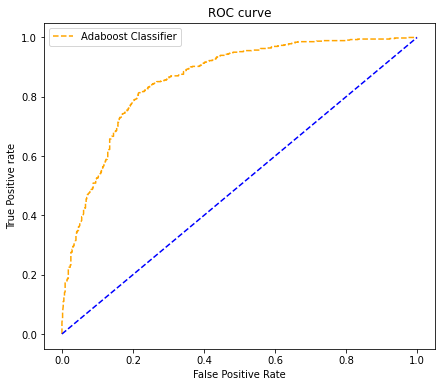

In [96]:
# plot roc curves
plt.figure(figsize=(7,6))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Adaboost Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## Reducing to Top 8 Features

In [98]:
x_feat_2 = under_sample[['customerID', 'gender', 'tenure', 'InternetService', 'OnlineBackup', 'OnlineSecurity', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn', 'ratio']]

Top 8 features: Tenure 1
MonthlyCharges 2
InternetService 3
PaymentMethod 4
Contract 5
PaperlessBilling 6
OnlineSecurity 7
OnlineBackup 8

# Encoding Categorical variables

In [102]:
df_encoded_2 = pd.get_dummies(x_feat_2, columns=['InternetService',
       'OnlineBackup', 'OnlineSecurity', 
       'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [103]:
x_2 = df_encoded_2.drop(['customerID','gender','ratio','Churn'],axis=1)
y_2 = df_encoded['Churn']

# MinMax Scaling

In [105]:
x_scaled_2 = pd.DataFrame(scaler.fit_transform(x_2), columns=x_2.columns)

# Train Test Split

In [106]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_scaled_2, y_2, test_size=0.3, random_state=101)

# Fitting on model with best parameters 
#### (n_estimators=1000, learning_rate=0.1)

In [107]:
ada_tuned.fit(x_train_2,y_train_2)
y_pred_2 = ada_tuned.predict(x_test_2)

# Check performance

In [108]:
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
auc_2 = roc_auc_score(y_test_2, y_pred_2)
f1score_2 = f1_score(y_test_2, y_pred_2)
cm_2 = confusion_matrix(y_test_2, y_pred_2)
class_rep_2=classification_report(y_test_2, y_pred_2)


print ('Accuracy score on Test is ', accuracy_2)
print ('AUC Score is', auc_2)
print ('F1 Score is ', f1score_2)
print ('Confusion Matrix\n\n', cm_2)
print('Classification Report is\n', class_rep_2)

Accuracy score on Test is  0.7825311942959001
AUC Score is 0.7821818043163273
F1 Score is  0.7966666666666667
Confusion Matrix

 [[400 158]
 [ 86 478]]
Classification Report is
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       558
           1       0.75      0.85      0.80       564

    accuracy                           0.78      1122
   macro avg       0.79      0.78      0.78      1122
weighted avg       0.79      0.78      0.78      1122



## Plotting AUC for ROC

In [109]:
pred_prob2 = ada_tuned.predict_proba(x_test_2)
fpr2, tpr2, thresh2 = roc_curve(y_test_2, pred_prob2[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test_2))]
p_fpr, p_tpr, _ = roc_curve(y_test_2, random_probs, pos_label=1)

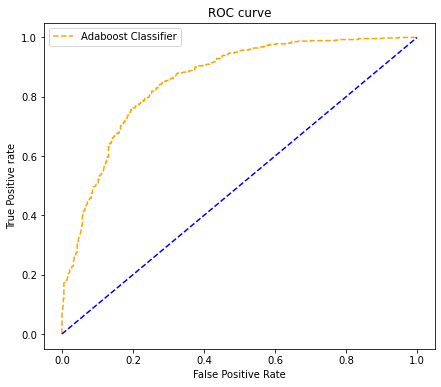

In [110]:
# plot roc curves
plt.figure(figsize=(7,6))
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Adaboost Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()